<h1 style="text-align:center"> Programmation dynamique</h1>



Nous allons tenter ici d'optimiser certains algorithmes qui répètent de nombreuses fois une partie des tâches qui pourraient être mémorisées.


## I - Suite de Fibonacci

**Exercice 1 :**
Programmer la fonction **récursive** `fib(n)` qui permet de calculer le terme de rang *n* de la suite de Fibonacci.

Pour rappel :
<center>$u_0 = 0 ; u_1 = 1 ; \forall n \geq 2, u_{n} = u_{n-1}+u_{n-2}$</center>

In [ ]:
def fib(n):
    """ Faire la programmation récursive """
    pass


In [ ]:
# Test pour les 10 premiers rangs
for i in range(10):
    print(fib(i))


En quoi y a-t-il dans le calcul du terme $u_n$ de nombreuses répétitions évitables dans cet algorithme (dès que $n$ dépasse 3) ?

On peut représenter la problématique par l'arbre suivant, pour le calcul du terme de rang 6 : 

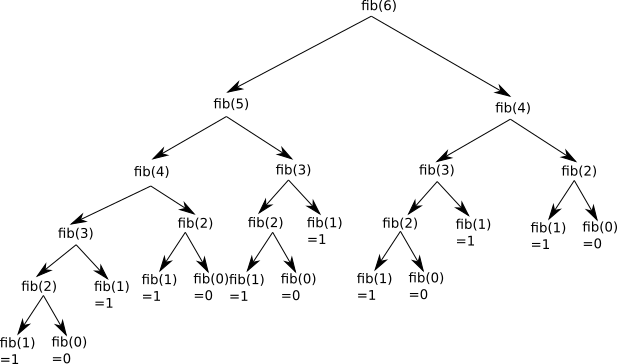



Le calcul du terme de rang 3 pourrait donc être fait une fois pour toutes et stocké en mémoire.

**Exercice 2 :**

Compléter la fonction `fibMem(n)` ci-dessous.
On stockera les termes de la suite entre les rangs 0 et $n$ dans une variable globale `tableauMemoire`. 

Par défaut, cette variable est une liste de $n+1$ zéros (pour l'appel au calcul du rang $n$) initialisée dans une première fonction `fibonacciDynamique(n)`.

In [ ]:
def fibonacciDynamique(n):
    global tableauMemoire
    tableauMemoire = [0] * (n+1)
    return fibMem(n)

def fibMem(n):
    # cas 0 ou 1
    if ..............................:
        ..............................
    # cas où on connaît déjà la valeur dans la liste globale
    elif tableauMemoire[n] > 0:
        return ..............................
    # cas où il faut faire un calcul
    else:
        ..............................
        ..............................
    
print(fibonacciDynamique(10))


In [ ]:
fib(8)


In [ ]:
fibonacciDynamique(8)


In [ ]:
fibonacciDynamique(50)


La **programmation dynamique** est donc une méthode algorithmique pour résoudre des problèmes d'optimisation.
Introduite formellement en 1953 par l'américain Richard Bellman, elle consiste à résoudre un problème en le décomposant en sous-problèmes, puis à résoudre les sous-problèmes, des plus petits aux plus grands en stockant les résultats intermédiaires.

On a ci-dessus stocké en mémoire selon un procédé qu'on nomme **mémoïsation**.

L'économie est substantielle dès que la valeur de $n$ augmente :
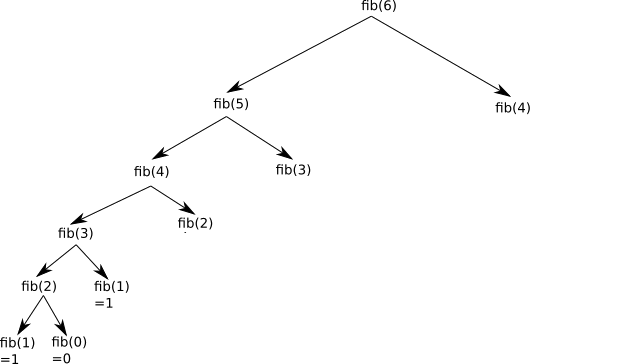

**Exercice 3 :** Comparaison des méthodes

Nous allons tester la durée d'exécution de ces fonctions.

Pour cela, utilisons le module `time` de Python.

In [ ]:
import time

def duree(fonction, argument):
    temps = time.time()
    resultat = fonction(argument)
    return fonction.__name__, time.time() - temps


1. On a ci-dessous utilisé la fonction `duree` pour mesurer le temps d'exécution de la fonction `fib` pour $n=10$.

In [ ]:
duree(fib,10)


Exécuter la fonction `fibonacciDynamique` pour la même valeur de $n$.

2. Comparer les durées d'exécution des versions simple et dynamique de Fibonacci pour $n = 30$.  

3. a) Dans une première liste `antecedents`, stocker les nombres de 0 à 30.

b) Dans une seconde liste `imagesFib`, stocker les durées mises par l'algorithme `fib` pour les valeurs de $n$ allant de 0 à 30.

c) Dans une troisième liste `imagesFibDyn`, stocker les durées mises par l'algorithme `fibonacciDynamique` pour les valeurs de $n$ allant de 0 à 30.

4. Tracer le graphique des durées en utilisant matplotlib

In [ ]:
# L'instruction suivante permet de représenter le graphique dans la console Python :
%matplotlib inline

# Importation de l'objet pyplot (renommé plt)
import matplotlib.pyplot as plt

plt.plot(antecedents,imagesFib)
plt.plot(antecedents,imagesFibDyn)
plt.show()


## Problème du rendu de monnaie

Le titre vous rappelle des souvenirs ?

L'objectif de ce paragraphe est de proposer la combinaison optimale de pièces dans un système monétaire donné pour rendre une certaine somme d'argent.

Exemples :
* Système E : système canonique européen actuel de pièces et de billets (exprimés en centimes d'€) 
`[1,2,5,10,20,50,100,200,500,1000,2000,5000,10000,20000]`

* Système B : système britannique pré-1971 de pièces et billets (exprimés en pence) non canonique

`[1,3,4,6,12,360]`

<div style="color:blue;font-style:italic;">
    Pour information : 12 pence = 1 shilling ; 20 shilling = 1 livre ; pence = pluriel de penny
</div>

**Exercice 4 :** Raisonnements simples

1. Combien de pièces au minimum faut-il pour rendre 6 centimes dans le système canonique européen ? Et dans le système B ?






2. Qu'en est-il dans ces deux systèmes pour la somme de 13 centimes ?

**Exercice 5 :** 

On veut écrire l'algorithme qui détermine le minimum de pièces utilisées pour un certain rendu dans un certain système monétaire.

Pour cela, le principe récursif est le suivant :
* on regarde un certain rendu
* on teste pour chaque pièce du système monétaire en place si on peut s'en servir pour le rendu (possible si la valeur de la pièce est plus petite que le rendu)
* Si on peut se servir d'une pièce, on calcule `rendu - valeurPièce` et on relance récursivement l'algorithme pour ce nouveau rendu inférieur.

Illustration ci-dessous : 
<div style="width:500px;margin:auto;">

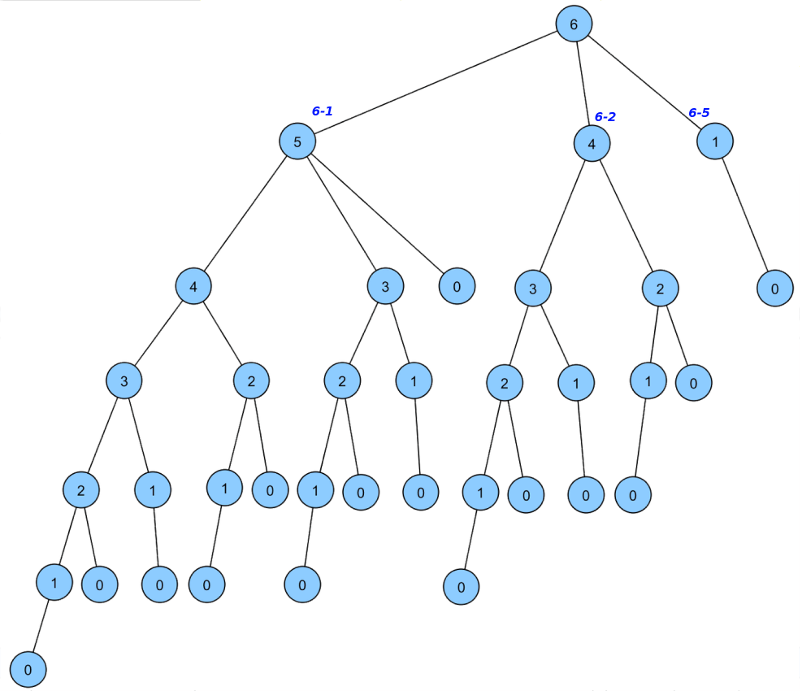

</div>

Compléter l'algorithme récursif suivant qui détermine le minimum de pièces utilisées pour un certain `rendu` selon le système monétaire mis en place (mémorisé dans la variable `systeme`).


In [ ]:
from math import inf

def renduRecursif(rendu,systeme):
    # Si la somme à rendre est nulle, il faut 0 pièces :
    if ..............................:
        # si la somme à rendre est nulle, il faut 0 pièces
        return 0
    else:
        nbMinimal = inf # on initialise le nombre minimal de pièces à une trop haute valeur
        
        # On va tenter de minimiser le rendu avec chaque pièce du système monétaire
        for piece in systeme: # on parcourt chaque pièce de la liste des pièces/billets
            # Si la pièce est plus petite que le rendu :
            if ..............................:
                # On calcule le montant restant si on enlève la valeur de cette pièce au rendu
                montantRestant = ..............................
                # On cherche le nombre minimal de pièces nécessaires pour la somme restante  
                nbMiniPourMontantRestant = renduRecursif(montantRestant,systeme)
                # Le nombre minimal de pièces pour le montant actuel avec cette pièce est alors de :
                nbMiniAvecCettePiece = ..............................
                
                # Si ce nombre est plus petit que le nombre minimal trouvé jusqu'à présent :
                if ..............................:
                    .............................. # On mémorise cette meilleure solution
        
        # On renvoie le nombre minimal de pièces :
        return nbMinimal


In [ ]:
renduRecursif(6, [1,3,4]) # résultat attendu : 2

In [ ]:
renduRecursif(6, [4,3,1]) # résultat attendu : 2

In [ ]:
renduRecursif(6, [1,2,5,10,20,50,100,200]) # résultat attendu : 2

In [ ]:
renduRecursif(8, [1,2,5,10,20,50,100,200]) # résultat attendu : 3

In [ ]:
renduRecursif(8, [1,3,4])

**Exercice 6 :**
Programmation dynamique de cet algorithme.

On reprend la même idée que pour l'algorithme programmant le calcul des termes de Fibonacci :
* une première fonction qui crée une variable globale, qui est une liste de $n+1$ valeurs nulles jusqu'au rendu $n$ puis qui appelle la fonction récursive.
* la fonction récursive qui stocke dans la liste afin de ne pas refaire le calcul.

Le but est d'obtenir ceci :

<div style="width:500px;margin:auto;">
    
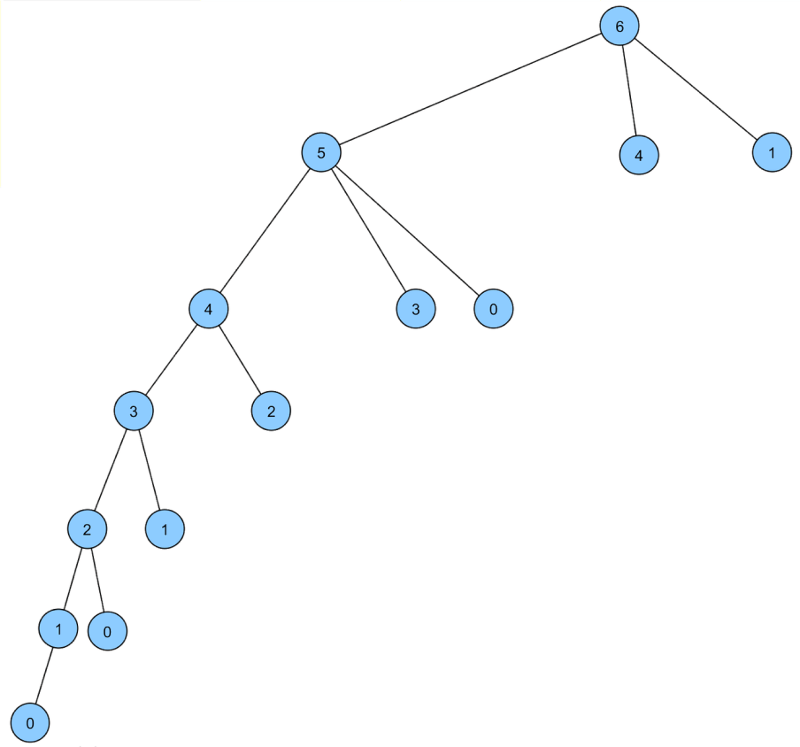
    
</div>

In [ ]:
def renduDynamique(rendu, systeme):
    global tableauMemoire
    tableauMemoire = [0] * (rendu + 1)
    return renduDynamiqueRecursif(rendu, systeme)

def renduDynamiqueRecursif(rendu, systeme):
    """ On reprendra l'architecture de l'algorithme de l'exercice précédent """
    pass


In [ ]:
renduDynamique(279, [1,3,4]) # résultat attendu : 2


Cette manière de programmer est appelée **Top-Down** (*Haut-descendant*) : on part de la racine de l'arbre et on descend vers les feuilles dès que l'on peut.

Il est possible de voir les choses différemment, en partant de la base. On parle alors de programmation **Bottom-Up** (*Bas-remontant*).

**Exercice 7 :**
Commenter le code ci-dessous :

In [ ]:
def renduBottomUp(rendu, systeme):
    tableauMemoire = [0] * (rendu + 1)
    for x in range(1,rendu + 1):
        nbMinimal = inf
        for piece in systeme:
            if (piece <= x) and (1 + tableauMemoire[x - piece]< nbMinimal):
                nbMinimal = 1 + tableauMemoire[x - piece]
        tableauMemoire[x] = nbMinimal
    return tableauMemoire[rendu]


In [ ]:
renduBottomUp(8, [1,2,5,10,20,50,100,200])


In [ ]:
renduBottomUp(8, [1,3,4])


In [ ]:
renduBottomUp(279, [1,2,5,10,20,50,100,200])


**Exercice 8 :**

Il nous reste à implémenter la combinaison de pièces optimale, car pour l'instant nous n'avons que le nombre minimal de pièces.

Reprendre l'algorithme de l'exercice 6 (bottom-up) et insérer dans l'algorithme une liste `pieceOptimale` de $n+1$ éléments qui gardera en mémoire la valeur de la première pièce utilisée pour le rendu.

Ainsi, pour $n=8$ :
<center>
    <table>
        <tr>
            <td>rendu</td>
            <td>0</td>
            <td>1</td>
            <td>2</td>
            <td>3</td>
            <td>4</td>
            <td>5</td>
            <td>6</td>
            <td>7</td>
            <td>8</td>
        </tr>
        <tr>
            <td>pieceOptimale</td>
            <td>0</td>
            <td>1</td>
            <td>2</td>
            <td>1</td>
            <td>2</td>
            <td>5</td>
            <td>1</td>
            <td>2</td>
            <td>1</td>
        </tr>
    </table>
</center>

In [ ]:
def renduBottomUpMemoire(rendu, systeme):
    tableauMemoire = [0] * (rendu + 1)
    pieceOptimale = ..............................
    for x in range(1,rendu + 1):
        nbMinimal = inf
        for piece in systeme:
            if (piece <= x) and (1 + tableauMemoire[x - piece]< nbMinimal):
                nbMinimal = 1 + tableauMemoire[x - piece]
                piecePourNbMinimal = ..............................
        tableauMemoire[x] = nbMinimal
        pieceOptimale[x] = ..............................
        
    # Liste du rendu final à faire
    
    return tableauMemoire[rendu], pieceOptimale, listeRendu


In [ ]:
renduBottomUpMemoire(8, [1,3,4])


In [ ]:
renduBottomUpMemoire(17, [1,3,4])


Bibliographie :
* wikipedia.org
* cours d'Elisa Fromont (IRISA, Université de Rennes 1)
* Cours de programmation dynamique de [pixees.fr](https://pixees.fr/informatiquelycee/n_site/nsi_term_algo_progdyn.html)